# Programming for Data Analysis - Project 2 (2023)


## About / Introduction

Task - An analysis of paleo-present climate data

## Table of Contents

In [3]:
# test update comment 29/07/24 for github commit


## Steps to complete the project

- Data collection
- Load the data: use pandas to load these datasets into dataframes.
- convert .tx frile to readable csv files for Pandas
- merge up to date C02 data (Manau Loa 1958- present with Ice core data: stick together for C02 and Temp data cleansing)


## Data Collection
Obtain datasets for CO2 concentrations and temperature anomalies over the last 800kyrs.

sources:CO2 data: Ice core data, such as from the Vostok and EPICA Dome C ice cores, up to date(1958) Manau loa 
Temperature anomaly data: ice core data can provide temperature anomalies, often derived from isotopic analyses. 

## 1. Import the necessary Python Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the datasets

In [11]:
co2_data = pd.read_csv('C:/Users/conor/Downloads/Composite CO2 record (0-800 kyr BP).csv')
temperature_data = pd.read_csv('C:/Users/conor/Downloads/EPICA Dome C NOAA- 800KYr Deuterium Data and Temperature.csv')



# Display the first few rows to check the data
print(co2_data.head(10))     # Composite CO2 record (0-800 kyr BP). Present = 1950.
print(temperature_data.head(10))

   year    mean   unc
0  1959  315.98  0.12
1  1960  316.91  0.12
2  1961  317.64  0.12
3  1962  318.45  0.12
4  1963  318.99  0.12
5  1964  319.62  0.12
6  1965  320.04  0.12
7  1966  321.37  0.12
8  1967  322.18  0.12
9  1968  323.05  0.12
   Gasage (yr BP)   CO2 (ppmv)  sigma mean CO2 (ppmv)
0           -51.03      368.02                   0.06
1           -48.00      361.78                   0.37
2           -46.28      359.65                   0.10
3           -44.41      357.11                   0.16
4           -43.08      353.95                   0.04
5           -42.31      353.72                   0.22
6           -41.13      352.42                   0.10
7           -39.97      350.81                   0.16
8           -39.41      349.80                   0.14
9           -38.97      349.28                   0.13
   Bag  depth_top_m  age_calBP  Deuterium  Temperature
0    1         0.00  -50.00000        NaN          NaN
1    2         0.55  -43.54769        NaN          NaN

In [12]:
# # See gml.noaa.gov/ccgg/trends/ for additional details.
# modern C02 data from NOAA hawaii to present day

modern_co2_data = pd.read_csv('C:/Users/conor/Downloads/NOAA modern carbon dioxide record 1958.csv')
print(modern_co2_data.head(10))

   year    mean   unc
0  1959  315.98  0.12
1  1960  316.91  0.12
2  1961  317.64  0.12
3  1962  318.45  0.12
4  1963  318.99  0.12
5  1964  319.62  0.12
6  1965  320.04  0.12
7  1966  321.37  0.12
8  1967  322.18  0.12
9  1968  323.05  0.12


In [6]:
# check the column names
print(co2_data.columns)
print(temperature_data.columns)


Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')
Index(['Bag', 'depth_top_m', 'age_calBP', 'Deuterium', 'Temperature'], dtype='object')


In [7]:
# Rename the column to 'Year' for consistency
co2_data.rename(columns={'Gasage (yr BP) ': 'Year'}, inplace=True)
temperature_data.rename(columns={'age_calBP': 'Year'}, inplace=True)

### References for the above - save to github for referenece
- Composite of atmospheric CO2 records from Antarctic ice cores: Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.

- temp data: https://www.ncei.noaa.gov/access/paleo-search/study/6080 (converted from .txt file)

### Note 
This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias.

For latest anthropogenic data refer to NOAA/Mauna Loa record.

Age unit is in years before present (yr BP) whereas present refers to 1950.

Note, not all records shown in sheet "all records" are part of the composite. The following studies are part of the composite.
- -51-1800 yr BP:	Law Dome (Rubino et al., 2013)	
- 1.8-2 kyr BP:	Law Dome (MacFarling Meure et al., 2006)	
- 2-11 kyr BP:	Dome C (Monnin et al., 2001 + 2004)	
- 11-22 kyr BP:	WAIS (Marcott et al., 2014) minus 4 ppmv (see text)	
- 22-40 kyr BP:	Siple Dome (Ahn et al., 2014)	
- 40-60 kyr BP:	TALDICE (Bereiter et al., 2012)	
- 60-115 kyr BP:	EDML (Bereiter et al., 2012)	
- 105-155 kyr BP:	Dome C Sublimation (Schneider et al., 2013)	
- 155-393 kyr BP:	Vostok (Petit et al., 1999)	
- 393-611 kyr BP:	Dome C (Siegenthaler et al., 2005)	
- 612-800 kyr BP:	Dome C (Bereiter et al., 2014)	



The data from EPICA Dome C provides a detailed picture of climate changes over the last 800,000 years. It includes warm periods (interglacials) and cold periods (glacials or ice ages).

Using deuterium data, scientists can estimate the temperature at the time the ice was formed. By examining ice from different layers, they can build a record of how the Earth’s temperature has changed over hundreds of thousands of years.

This research helps us understand natural climate patterns and how they relate to changes in the Earth’s orbit and greenhouse gas levels.
It also provides context for current climate change, showing how today's temperature and CO2 levels compare to natural variations in the past.

The EPICA Dome C ice core data is typically considered to be up-to-date until around the year 2000 CE. The core was drilled between 1996 and 2004, and the most recent layers of ice would represent snow and ice deposited just before or around the time of drilling. Therefore, the study provides climate data from approximately 800,000 years ago up to about the year 2000.

### 3. Data Preprocessing
Ensure that the datasets are aligned correctly in terms of time periods. merge the datasets on a common time column.

In [12]:
# Define the bin size (e.g., 10000 years)
bin_size = 10000

# Create a new column for the binned time intervals
co2_data['Time_Bin'] = (co2_data['Year'] // bin_size) * bin_size
temperature_data['Time_Bin'] = (temperature_data['Year'] // bin_size) * bin_size

# Group by the binned time intervals and take the mean
co2_binned = co2_data.groupby('Time_Bin').mean().reset_index()
temperature_binned = temperature_data.groupby('Time_Bin').mean().reset_index()

# Merge the binned data
data_binned = pd.merge(co2_binned, temperature_binned, on='Time_Bin')

# Select only the relevant columns
filtered_data = data_binned[['Time_Bin', 'CO2 (ppmv)', 'Temperature']]

# Display the first few rows of the filtered data
print(filtered_data.head(10))


   Time_Bin  CO2 (ppmv)  Temperature
0  -10000.0  329.267869          NaN
1       0.0  283.192978    -0.351964
2   10000.0  229.331655    -4.314023
3   20000.0  189.240114    -9.281127
4   30000.0  200.329916    -8.078284
5   40000.0  205.908627    -7.333333
6   50000.0  216.784333    -6.401111
7   60000.0  205.186071    -8.328555
8   70000.0  233.049167    -6.259844
9   80000.0  233.205000    -4.735340


### Step 4: Data Analysis: CO2 vs Temperature Anomaly from 800kyrs – present(1950 approx).
analyze the relationship between CO2 concentrations and temperature anomalies. We can start by plotting the data.
see https://theconversation.com/the-three-minute-story-of-800-000-years-of-climate-change-with-a-sting-in-the-tail-73368: temp + C02 over time

** should see a perfect positive correlation **

<Figure size 1400x700 with 0 Axes>

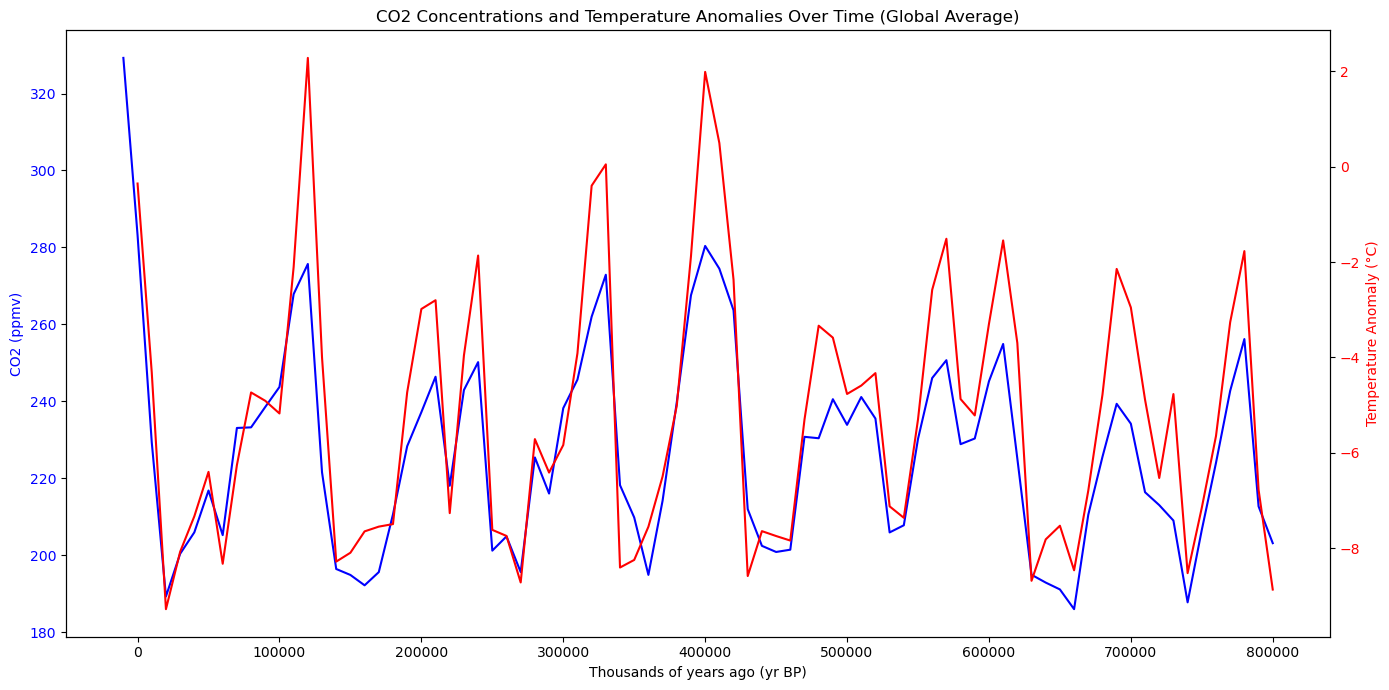

In [31]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named `data_binned` and contains 'Time_Bin', 'CO2 (ppmv)', and 'Temperature'

plt.figure(figsize=(14, 7))

# Create the primary axis for CO2
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot CO2 on the primary y-axis
ax1.plot(data_binned['Time_Bin'], data_binned['CO2 (ppmv)'], color='blue', label='CO2 (ppmv)')
ax1.set_xlabel('Thousands of years ago (yr BP)')
ax1.set_ylabel('CO2 (ppmv)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for Temperature Anomaly
ax2 = ax1.twinx()
ax2.plot(data_binned['Time_Bin'], data_binned['Temperature'], color='red', label='Temperature Anomaly (°C)')
ax2.set_ylabel('Temperature Anomaly (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and labels
plt.title('CO2 Concentrations and Temperature Anomalies Over Time (Global Average)')

# Add a legend
#fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


## Explanation of above plot

Generally, as CO2 concentrations rise, temperature anomalies also increase, suggesting that higher levels of CO2 in the atmosphere are associated with warmer global temperatures in recent times sepcifically post the last Ice age. The significant increase in levels post the Industiral revolution are more noteable as emmisions increase (ref: 1) https://theconversation.com/the-three-minute-story-of-800-000-years-of-climate-change-with-a-sting-in-the-tail-73368#:~:text=Thousands%20of%20years%20of%20snow,has%20varied%20through%20the%20millennia.)


In ancient climate records, temperature changes often occurred before changes in CO2 levels, due to complex feedback mechanisms in the Earth's climate system. For instance, changes in Earth's orbit could cause temperatures to rise, which then led to increased CO2 release from the oceans, further amplifying the warming.

However, in the modern era, CO2 levels are rising much faster than before, primarily due to human activities like burning fossil fuels. This increase in CO2 is happening more quickly than the rise in global temperatures, but temperatures are still rising as a result of the higher CO2 levels.

[2], [3], [4]. 

- Rapid CO2 Increase: Since the Industrial Revolution, CO2 levels have been rising at an unprecedented rate, faster than during natural historical processes.

- Temperature Lag: While global temperatures are also increasing, there's usually a delay because it takes time for the Earth's climate system, particularly the oceans, to fully react to higher CO2 levels.

- Modern Climate Change: Unlike in ancient times, today's rapid CO2 increase is the main driver of warming, leading to faster climate change than seen in past natural cycles.The rate of change since the mid-20th century is unprecedented over millennia. For millenia Ice core data showed us that atmospheric C02 levels were never above approx 300 ppvm.Modern data shows us that in 1958 these levels rose above approx. 360 ppvm and today the levels are as high as 420 ppvm. 

## Time lags
The time lag between CO2 levels and temperature changes varies depending on the timescale and context. 

1. Paleoclimate Context
Glacial-Interglacial Cycles: In paleoclimate records, such as those from ice cores, there is often a lag of about 200 to 800 years between temperature changes and CO2 levels during glacial-interglacial cycles. This lag occurs because temperature changes can initially cause CO2 to be released from oceans, which then amplifies the warming.

2. Modern Context
Short-Term Effects: In the modern era, the lag is much shorter. The warming effect of increased CO2 can be observed within a few years to a few decades. This is due to the relatively fast pace of CO2 emissions and the immediate impact on the greenhouse effect, though the full climatic response, including effects on ocean temperatures, may take longer to materialize.

Factors Influencing Lag Time:
Ocean Heat Storage: The oceans absorb and store heat, which can delay the full temperature response to increased CO2. This storage effect can contribute to a lag of several decades to centuries in observing the full temperature impact of CO2.

Climate System Feedbacks: Various feedback mechanisms, including ice-albedo feedbacks and changes in cloud cover, can also influence how quickly temperature responds to changes in CO2 levels.

## Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
https://en.wikipedia.org/wiki/Methane
do the same as above but for CH4 over time 


## Examine Irish context:
Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)


How have these climate changes affected Irish context- DATA FROM Irish location- observe and plot/ timeseries.
more / less / same levels of C02/ CH3/ average temp.

see global average versus ireland average


## Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats

## For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

## Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue

## Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)

## References

In [1]:
[1] https://theconversation.com/the-three-minute-story-of-800-000-years-of-climate-change-with-a-sting-in-the-tail-73368#:~:text=Thousands%20of%20years%20of%20snow,has%20varied%20through%20the%20millennia
[2] https://science.nasa.gov/climate-change/evidence/ 
[3] https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter01_SM.pdf 
[4] [NOAA - The Modern CO2 Record] {https://gml.noaa.gov/ccgg/trends/} 
[5] Climate Change: Atmospheric Carbon Dioxide . climate.gov
    

SyntaxError: invalid syntax (1369906921.py, line 1)

## My resources 
 - https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide
 - https://en.wikipedia.org/wiki/Temperature_anomaly
 - https://www.youtube.com/watch?v=I7jKxO4nKZc  
 - https://gml.noaa.gov/ccgg/carbontracker/
 - https://theconversation.com/the-three-minute-story-of-800-000-years-of-climate-change-with-a-sting-in-the-tail-73368
 

## END
***